### To Get Data

For this script to be accurate up to and including the month you are reporting on, you must download some data from the Authorize.net website (https://www.authorize.net/) and the Gravity website (https://gravitypayments.com).

### For Authorize.net  data
You need to download two things: The data for the entire month you are reporting on, and the data for the first few days of the following month. This is to account for the settlement period of orders placed at the end of the month you are reporting on. 

So if you are reporting on, say, Jan 2019, you would first download 01/01/2019 - 01/31/2019 and then in a separate download you do 02/01/2019 - 02/05/2019.

1. Sign-in to your Authorize.net account (Sign-in > Merchants)
2. Navigate to "Transaction Search"
3. Choose your date range(s) as outlined above by using the "From" and "To" drop-downs in the "Settlement Date" section
4. Click "Search" at the bottom
5. Click the "Download to File" button above the table
6. Choose the 3rd download option, which is "Expanded Fields/Comma Seperated"
7. Put this file in with the other statements, which can be found by going to Scripts/Fake Folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/Docs/Authorize.net Statements/. Be sure and change the format of the file name to match the previous files.
8. In this same directory, move the oldest .txt out of the "Authorize.net Statements" folder and into the "Authorize.net Statements more than one year old" folder. Do this because you don't need this data, and the script takes a long time to change the date columns into the right data type, so any data not needed should be discarded.

### For Gravity data
We need to hand-write the fee amount in the section below titled "Gravity Fees". We get this data from the monthly PDF statement found on the Gravity website  
1. Click Log-in and choose "Merchant No. Starting With 5"
2. Sign-in
3. Navigate to "Statements" 
4. "Report Period" is the month you are reporting on
5. Click "Search" and the PDF will download.  Be sure and change the file name to match the previous files.
6. Move this PDF statement to this folder: Authorize.net and Gravity Monthly Audit > Docs > Gravity Statements
7. Open the PDF statement and look at the "Fees Charged" amount in the summary table
8. Enter this amount along with the year and month in the section below titled "Gravity Fees". Be sure to copy the exact format of the previous entries.

### Report Output
The report will be written to here: Scripts/Fake Folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/Docs/Monthly Reports

### About the PDF report
Sometimes the PDF report will generate and have strange line breaks. If this happens, just rereun the single cell towards the end of this script, under the section header titled "PDF Start".

### Gravity fees
Fill-in the latest fee total by hand by following the instructions above.

In [1]:
gravity_fees = {'2017-12':47223,
                '2018-01':43771,
                '2018-02':41925,
                '2018-03':54524,
                '2018-04':41729,
                '2018-05':43243,
                '2018-06':40589,
                '2018-07':42123,
                '2018-08':43263,
                '2018-09':40035,
                '2018-10':43304,
                '2018-11':47133,
                '2018-12':41399,
                '2019-01':42309,
                '2019-02':42052,
                '2019-03':51542,
                '2019-04':43675,
                '2019-05':41426}

### Change this stuff

In [ ]:
# change this date range, make the end date the last day on which you want to report, and go back one year
date_start = '2018-05-01'
date_end = '2019-05-31'

# do you want to run the script AND write the PDF? or just run the script?
# the script will run regardless of what you choose here.
# choose "yes" or "no"
write_pdf = 'yes'

### Now click Cell > Run All to run the entire script

### Libraries

In [4]:
import os
tilde = os.path.expanduser('~')

import sys
sys.path.insert(0, tilde + '/Scripts/Fake Folder/Python Libraries')

from jb_libraries import *
%matplotlib inline

from osh_data import *
import math

### Script settings

In [5]:
report_dict = {}

In [6]:
d = pd.date_range(pd.to_datetime(date_start), pd.to_datetime(date_end), freq = 'MS')
d = [str(x) for x in d]
pretty_dates = jb_dates(pd.Series(d), 'year and month xticks')

now = dt.datetime.now().date()
now_pretty = str(dt.datetime.now().date())

csv_path = tilde + '/Scripts/fake folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/Docs/Authorize.net Statements/'

html_path = tilde + '/Scripts/fake folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/HTML/'
html_title = 'Authorize net and Gravity Monthly Audit.html'

style_sheet_path = tilde + '/Scripts/fake folder/CSS Stylesheets/Recurring Reports Stylesheet.css'

image_path = tilde + '/Scripts/fake folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/Images/'

pdf_path = tilde + '/Scripts/fake folder/Finance/Recurring/Authorize.net and Gravity Monthly Audit/Docs/Monthly Reports/'

### Chart settings

In [7]:
#plt.rcdefaults()
#plt.rcParams.keys()

plt.rcParams['lines.linewidth'] = 5
plt.rcParams['legend.fontsize'] = 20

plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.sans-serif'] = 'Arial'

plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.titleweight'] = 'bold'

plt.rcParams['axes.labelsize'] = 25
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

colors = ['#edf8ff','#1689b9','#0a507c','#fefefe','#b5b8c4','#edf8ff']

### Get Auth.net statements
Not all data is usable, this is a consequence of how Authorize.net formats their CSVs, any unusable data will be discarded and highlighted in red below.

In [8]:
all_files = glob.glob(csv_path + '*.txt')
frame = pd.DataFrame()
list_ = []

for file_ in all_files:
    df = pd.read_csv(file_,
                     error_bad_lines = False)
    list_.append(df)
    
csv_super_main = pd.concat(list_, sort = False)

b'Skipping line 4743: expected 54 fields, saw 66\nSkipping line 4744: expected 54 fields, saw 59\n'
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (33,45,46,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (33,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Clean it

In [9]:
csv_main = csv_super_main.copy()

csv_main.columns = [x.lower() for x in csv_main.columns]
csv_main['transaction status'] = [x.lower() for x in csv_main['transaction status']]

d = {'Authorization Only':'auth only',
    'Authorization w/ Auto Capture':'capture',
    'Credit':'credit'}
for k,v in d.items():
    csv_main['transaction type'] = csv_main['transaction type'].replace(k,v)    
csv_main.rename(columns = {'authorization type':'action code'}, inplace = True)

for i in range(2):
    csv_main.dropna(how = 'all', axis = i, inplace = True)

date_nulls = pd.DataFrame()
ls = ['submit','settlement']
for col in ls:
    csv_main[col + ' date/time'] = pd.to_datetime(csv_main[col + ' date/time'])
    csv_main[col + ' date'] = [str(x.date()) for x in csv_main[col + ' date/time']]    
    csv_main['year and month ' + col] = [str(x)[:7] for x in csv_main[col + ' date/time']]
    
    # save the nulls, for reference
    n = csv_main[(csv_main[col + ' date/time'].isnull())]
    date_nulls = date_nulls.append(n, sort = False)
    
    csv_main.dropna(subset = [col + ' date/time'], inplace = True)
    
print('there were {} date nulls that have been removed'.format(len(date_nulls)))

# the fee changed from $0.05 to $0.10 on 2017-04-01
csv_main['transaction fee'] = np.where(csv_main['year and month settlement'] <= '2017-04', 0.05, 0.10)

# and changed again, from $0.05 to $0.03 in Dec 2018
csv_main['transaction fee'] = np.where(csv_main['year and month settlement'] >= '2018-12', 0.03, 0.10)

there were 0 date nulls that have been removed


### Clean up the columns

In [10]:
csv_main.rename(columns = {'settlement amount':'csv total'}, inplace = True)    
csv_main['csv total'] = pd.to_numeric(csv_main['csv total'])

csv_main['transaction id'] = pd.to_numeric(csv_main['transaction id'])

cols = ['transaction id',
       'transaction status',
       'transaction type',
       'submit date/time',
       'submit date',
       'year and month submit',
       'settlement date/time',
       'settlement date',
       'year and month settlement',
       'csv total',
       'transaction fee',
       'invoice number']
csv_main = csv_main[cols]

csv_main = csv_main[csv_main['settlement date'].between(date_start, date_end)].copy()

### Get database data

In [11]:
db1 = pd.read_sql(
'''
SELECT
order_id AS orders_id,
response_code AS db_response_code,
LOWER(authorization_type) AS transaction_type,
transaction_id
FROM authorizenet
WHERE transaction_id >= '''+ str(csv_main['transaction id'].min()) +'''
''', db)

db2 = pd.read_sql(
'''
SELECT
orders_id,
response_code AS db_response_code,
LOWER(authorization_type) AS transaction_type,
transaction_id
FROM authorizenet_zero
WHERE transaction_id >= '''+ str(csv_main['transaction id'].min()) +'''
''', db)

db_main = pd.concat([db1, db2], sort = True)
col_fix(db_main)

response_codes_dict = {1:'approved',
                       2:'declined',
                       3:'error',
                       4:'action required'}
db_main['response code str'] = db_main['db response code'].map(response_codes_dict)

db_main.drop_duplicates(inplace = True)
db_main['transaction id'] = pd.to_numeric(db_main['transaction id'])

db_main['transaction type'] = [x.replace('_',' ') for x in db_main['transaction type']]

d = {'prior auth capture':'capture',
    'auth capture':'capture'}

for k,v in d.items():
    db_main['transaction type'] = db_main['transaction type'].replace(k,v)

ot = pd.read_sql(
'''
SELECT
DATE(o.date_purchased)AS date_purchased,
DATE_FORMAT(o.date_purchased, '%Y-%m') AS year_and_month_purchased,
o.orders_id,
ot.value AS ot_total,
IF(o.orders_fake = 1, 'yes','no') AS fake_order,
os.orders_status_name,
o.payment_method,
o.orders_billing_status
FROM orders o
JOIN orders_total ot ON o.orders_id = ot.orders_id
AND ot.class = 'ot_total'
JOIN orders_status os ON o.orders_status = os.orders_status_id
# one month behind the "date start" that we set way up at the start of this script
WHERE DATE(o.date_purchased) >= ' '''+ str((pd.to_datetime(date_start) - pd.DateOffset(months = 1)).date()) +''' '
AND o.payment_method IN ('Credit Card', 'Subscription','Purchase Order','Purchase Order - Wire Transfer')
''', db)

col_fix(ot)

deleted = pd.read_sql(
'''
SELECT
orders_id
FROM orders_deleted
''', db)

col_fix(deleted)

bs = pd.read_sql(
'''
SELECT
*
FROM billing_status
''', db)

col_fix(bs)

ot['billing status name'] = ot['orders billing status'].map(dict(zip(bs['bs status id'], bs['bs status name'])))

### Create the dataframe we will use for the audit

In [12]:
audit_main = pd.merge(csv_main, db_main, how = 'left', on = ['transaction id','transaction type']).merge(ot, how = 'left', on = 'orders id')
audit_main['orders id'] = [float(x) for x in audit_main['orders id']]

### Get avg time between purchased and settled

In [13]:
for_avg = audit_main[audit_main['transaction status'] == 'settled successfully']

elapsed = pd.DataFrame(for_avg['settlement date/time'] - for_avg['submit date/time'])
jb_conf(elapsed).loc[:'upper']

,0
lower,1 days 22:16:11.474320
mean,1 days 22:34:36.724710
upper,1 days 22:53:01.975100


### Extract OID from CSV "invoice number"
Some orders (like Fake orders, wire transfers, etc.), when the data is retrieved from the database, don't always have an OID where it should be. We need this OID for the audit, so for the lines which DON'T have an OID, we source the OID from the Authorize.net CSVs, but we do this only where we need to.

In [14]:
# create OID patch
oid_patch = audit_main[audit_main['orders id'].isnull()].copy()
oid_patch['invoice number'] = oid_patch['invoice number'].replace('none', np.nan)

oids = pd.DataFrame(oid_patch['invoice number'].str.split('-', expand = True)[0])

# some are not OIDs, so these are greater than 7 characters long
# remove these
remove = oids[np.logical_or(oids[0].str.len() < 7, oids[0].str.len() > 7)].index
oids.drop(remove, axis = 0, inplace = True)

oid_patch['orders id'] = oid_patch.index.to_series().map(dict(zip(oids.index.to_series(), oids[0])))

# drop the patch from the main df
audit_main.drop(oid_patch.index, inplace = True)

# add the patch back in
audit_main = pd.concat([audit_main, oid_patch], sort = False)
audit_main.reset_index(drop = True, inplace = True)
audit_main['orders id'] = pd.to_numeric(audit_main['orders id'], downcast = 'integer')

### Add other details

In [15]:
audit_main['deleted'] = np.where(audit_main['orders id'].isin(deleted['orders id'].tolist()), 'yes','no')

for col in ['fake order','orders status name','payment method']:
    audit_main[col] = audit_main['orders id'].map(dict(zip(ot['orders id'], ot[col])))

### View nulls that should not be nulls

In [16]:
# all orders which match these conditions should not be null
# if they are null, look into each one individually and figure out why they are nulls
n = audit_main[(audit_main.isnull().any(1)) 
             & (audit_main['transaction type'] == 'capture')
             & (audit_main['deleted'] == 'no')
             & (audit_main['fake order'] == 'no')
             & (audit_main['transaction status'] == 'settled successfully')]

if n.empty:
    print('no nulls')
else:
    print('these ')
    display(n)

no nulls


### Get revenue data

In [17]:
all_revenue = pd.read_sql(
'''
SELECT
DATE_FORMAT(o.date_purchased, '%Y-%m') AS year_and_month,
SUM(ot.value) AS total_revenue
FROM orders_total ot
JOIN orders o ON ot.orders_id = o.orders_id
AND DATE(o.date_purchased) BETWEEN ' '''+ date_start +''' ' AND ' '''+  date_end +''' '
AND o.orders_status NOT IN (8,9,10,11,12,14,15)
WHERE ot.class = 'ot_total'
GROUP BY DATE_FORMAT(o.date_purchased, '%Y-%m')
''', db)

col_fix(all_revenue)
all_revenue.set_index('year and month', inplace = True)

In [18]:
r_main = audit_main[(audit_main['response code str'] == 'approved') & (audit_main['transaction status'] == 'settled successfully')].copy()
r_main['difference'] = r_main['csv total'] - r_main['ot total']

r_by_month = r_main.groupby('year and month settlement')[['csv total','ot total']].sum()
r_by_month['difference'] = r_by_month['csv total'] - r_by_month['ot total']
r_by_month = r_by_month.join(all_revenue)
r_by_month['cc as % total'] = r_by_month['csv total']/r_by_month['total revenue']

fmt = ['m0','m0','m0','m0','p1']

m = jb_mean(r_by_month, fmt)
y = jb_yoy(r_by_month)

display(m.join(y))
r_by_month.format_(fmt)

,mean,yoy
Csv Total,"$1,910,018",-8.57%
Ot Total,"$1,909,355",-8.63%
Difference,$663,"3,513.38%"
Total Revenue,"$3,839,771",-10.54%
Cc As % Total,50.1%,2.20%


,Csv Total,Ot Total,Difference,Total Revenue,Cc As % Total
year and month settlement,,,,,
2018-05,"$1,940,297","$1,940,265",$32,"$4,144,781",46.8%
2018-06,"$1,787,599","$1,787,544",$55,"$3,504,551",51.0%
2018-07,"$1,880,246","$1,880,221",$26,"$3,680,263",51.1%
2018-08,"$1,878,472","$1,878,418",$54,"$3,402,521",55.2%
2018-09,"$1,753,679","$1,753,581",$98,"$3,318,693",52.8%
2018-10,"$1,983,376","$1,982,007","$1,369","$4,485,112",44.2%
2018-11,"$2,101,267","$2,099,532","$1,735","$4,150,732",50.6%
2018-12,"$1,905,397","$1,904,605",$792,"$3,442,318",55.4%
2019-01,"$1,913,063","$1,910,915","$2,148","$3,752,489",51.0%


### For report

In [19]:
a = r_by_month.iloc[-1]['csv total']
b = r_by_month.iloc[0]['csv total']
c = a/b-1

w1 = 'Credit card revenue totaled ${:,.0f}, {} {:,.1f}% from last year\'s ${:,.0f}.'.format(a,
                                                                                          'down' if c < 0 else 'up',
                                                                                          np.abs(c) * 100,
                                                                                          b)

a = r_by_month.iloc[-1]['cc as % total']
b = r_by_month['cc as % total'].mean()

if np.abs(a-b) < 0.01:
    res = 'about equal to'
else:
    if a < b:
        res = 'less than'
    else:
        res = 'greater than'

w2 = 'As a proportion of total monthly revenue, credit cards made up {:,.1f}%, {} the average of {:,.1f}%'.format(a * 100,
                                                                                                                 res,
                                                                                                                 b * 100)

w3 = 'See below for credit card revenue over time'

write = ' '.join([w1,w2,w3])

report_dict['revenue write'] = write
report_dict['revenue write']

"Credit card revenue totaled $1,773,939, down 8.6% from last year's $1,940,297. As a proportion of total monthly revenue, credit cards made up 47.8%, less than the average of 50.1% See below for credit card revenue over time"

### Get mismatches
"Authorized" mismatches should all be zero  
"Charged" mismatches occur sometimes, if the mismatch is less than 1% of total revenue, it's ok to move on (this is checked below)  
"Refunded" mismatches are the highest, since CSP freely changes totals in the database which are not reflected in the Authorize.net data

In [20]:
mismatch = r_main[r_main['difference'] > 0].copy()
g1 = mismatch.groupby(['year and month settlement','billing status name'])[['difference']].sum().unstack(1).fillna(0)
g1.columns = g1.columns.droplevel(0)

fmt = ['m2','m2','m2']
display(g1.format_(fmt))

total = r_by_month.loc[date_end[:7]]['total revenue']

# if the totla "Charged" mismatch for the current month is greater than 1% of total revenue, raise an error
# run the cell below to view these mismatches
if g1.iloc[-1]['Charged']/total > 0.01:
    raise ValueError('check your "Charged" mismatches')

,Authorized,Charged,Refunded
year and month settlement,,,
2018-05,$0.00,$1.00,$32.21
2018-06,$0.00,$0.83,$54.76
2018-07,$0.00,$0.97,$25.27
2018-08,$0.00,$1.03,$53.20
2018-09,$0.00,$1.00,$98.04
2018-10,$0.00,$4.03,"$1,367.84"
2018-11,$0.00,$0.51,"$1,734.90"
2018-12,$0.00,$0.02,$791.60
2019-01,$0.00,$18.06,"$2,104.59"


### View current month mismatches

In [21]:
cols = ['date purchased',
        'transaction id',
        'orders id',
        'csv total',
        'ot total',
        'difference',
        'orders status name',
        'billing status name']

d = date_end[:7]

cur = mismatch[(mismatch['year and month settlement'] == d)
             & (mismatch['billing status name'] == 'Charged')
             & (mismatch['difference'] > 1)].copy()
cur.sort_values('difference', ascending = False, inplace = True)
cur['orders id'] = [int(x) for x in cur['orders id']]

fmt = [0,0,0,'m2','m2','m2',0,0]
display(cur[cols].format_(fmt))

,Date Purchased,Transaction Id,Orders Id,Csv Total,Ot Total,Difference,Orders Status Name,Billing Status Name
26234,2019-05-21,41368993885,2060318,"$1,599.09","$1,470.49",$128.60,Shipped,Charged
26443,2019-05-22,41369793469,2060712,$45.21,$41.97,$3.24,Shipped,Charged
27101,2019-05-23,61742173956,2061747,$43.29,$40.08,$3.21,Shipped,Charged


### Plot revenue

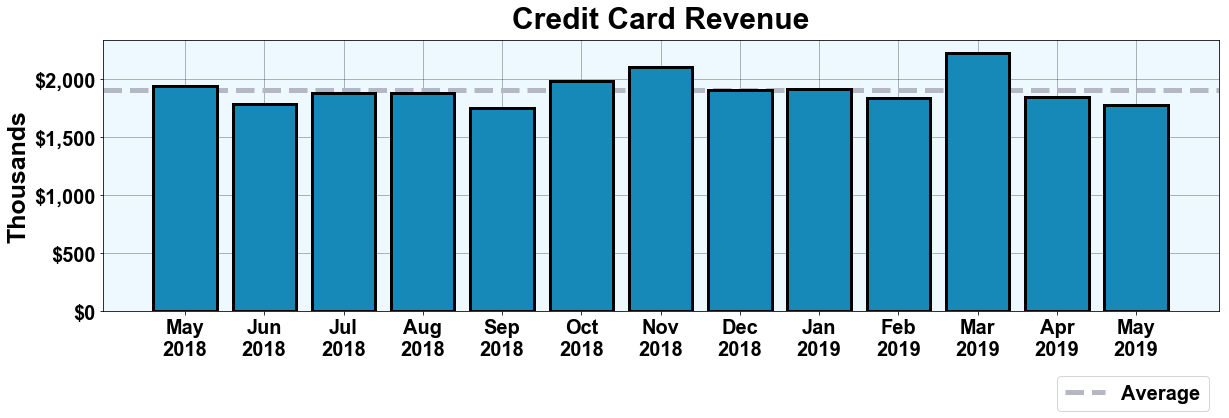

In [22]:
fig, ax = plt.subplots(figsize = (20,5))

x = np.arange(len(r_by_month))
y1 = r_by_month['csv total']

mean = y1.mean()

ax.axhline(mean, color = colors[4], ls = '--')

ax.bar(x, y1, color = colors[1], edgecolor = 'black', lw = 3, zorder = 5)
ax.set_yticklabels(['${:,.0f}'.format(x/1000) for x in ax.get_yticks()])
ax.set_ylabel('Thousands')
ax.set_xticks(x)
ax.set_xticklabels(pretty_dates)
ax.set_title('Credit Card Revenue', y = 1.02)
ax.set_facecolor(colors[5])
ax.grid(color = 'black', alpha = 0.35, zorder = 0)
ax.legend(['Average'], bbox_to_anchor = (1, -0.2)) 

plt.savefig(image_path + ax.get_title(), bbox_inches = 'tight')
plt.show()

### Counts and Fees
Most of these counts will exactly match Authorize.net > Account > Statements > Billing Statement, but some will be a little off, this is because we excluded some data because Authorize.net does not always keep the same formatting in their CSV statements, and some data must be discarded because it's too messy to fix by hand.

In [23]:
c1 = audit_main.groupby(['year and month settlement','transaction status'])[['transaction id']].count().unstack()
c1.columns = c1.columns.droplevel(0)
c1['total count'] = c1.sum(1)

c1 = c1.join(audit_main.groupby(['year and month settlement'])[['transaction fee']].sum())

grav = pd.DataFrame(list(gravity_fees.items()), columns = ['year and month','gravity fee'])
grav.set_index('year and month', inplace = True)
c1 = c1.join(grav)

c1['total fee'] = c1[['transaction fee','gravity fee']].sum(1)
c1['fee as % of revenue'] = c1['total fee'].div(r_by_month['csv total'].values)

for_avg = ot.groupby('year and month purchased')[['orders id']].count()
for_avg = for_avg[(for_avg.index >= date_start[:7]) & (for_avg.index <= date_end[:7])]

c1['aov'] = r_by_month['csv total'].div(for_avg['orders id'], axis = 0)

fmt = (['n0'] * (c1.columns.get_loc('total count') + 1)) + ['m0','m0','m0','p1','m0']

m = jb_mean(c1, fmt)
y = jb_yoy(c1)

display(m.join(y))
c1.format_(fmt).replace(['nan%','nan'],'')

,mean,yoy
Comm Error,1,
Credited,144,105.81%
Declined,"1,806",-4.70%
Expired,123,-13.61%
General Error,19,50.00%
Settled Successfully,"13,837",-10.17%
Voided,"1,990",-30.00%
Total Count,"17,920",-11.79%
Transaction Fee,"$1,181",-73.54%
Gravity Fee,"$43,238",-4.20%


,Comm Error,Credited,Declined,Expired,General Error,Settled Successfully,Voided,Total Count,Transaction Fee,Gravity Fee,Total Fee,Fee As % Of Revenue,AOV
year and month settlement,,,,,,,,,,,,,
2018-05,,86,"1,468",147,2,"12,739","2,253","16,695","$1,669","$43,243","$44,912",2.3%,$146
2018-06,,73,"1,219",155,9,"11,437","1,796","14,689","$1,469","$40,589","$42,058",2.4%,$154
2018-07,,75,"1,566",87,142,"14,870","1,803","18,543","$1,854","$42,123","$43,977",2.3%,$120
2018-08,,96,"1,356",107,2,"12,193","1,758","15,512","$1,551","$43,263","$44,814",2.4%,$152
2018-09,,67,"1,529",115,7,"13,344","2,092","17,154","$1,715","$40,035","$41,750",2.4%,$118
2018-10,,163,"1,476",116,4,"13,996","1,789","17,544","$1,754","$43,304","$45,058",2.3%,$147
2018-11,,214,"1,836",117,8,"14,484","2,698","19,357","$1,936","$47,133","$49,069",2.3%,$114
2018-12,,140,"1,576",136,4,"16,397","2,400","20,653",$620,"$41,399","$42,019",2.2%,$143
2019-01,,195,"1,562",98,7,"13,743","1,769","17,374",$521,"$42,309","$42,830",2.2%,$132


### For report: counts and AOV

In [24]:
a = c1.iloc[-1]['total count']
b = c1.iloc[0]['total count']
c = a/b-1

w1 = 'The number of transactions {} {:,.1f}% year over year, {} from x{:,.0f} to x{:,.0f}.'.format('decreased' if c < 0 else 'increased',
                                                                                               np.abs(c) * 100,
                                                                                               'down' if c < 0 else 'up',
                                                                                               b,
                                                                                               a)

a = c1.iloc[-1]['aov']
b = c1.iloc[0]['aov']
c = a/b-1

w2 = 'The average order value (AOV) {} {:,.1f}%, {} from ${:,.0f} to ${:,.0f}.'.format('decreased' if c < 0 else 'increased',
                                                                                       np.abs(c) * 100,
                                                                                       'down' if c < 0 else 'up',
                                                                                       b,
                                                                                       a)

w3 = 'Check out the chart below which shows the order count and AOV over time.'

write = ' '.join([w1,w2,w3])
report_dict['order count and aov write'] = write
report_dict['order count and aov write']

'The number of transactions decreased 11.8% year over year, down from x16,695 to x14,727. The average order value (AOV) increased 3.6%, up from $146 to $152. Check out the chart below which shows the order count and AOV over time.'

### For report: fees

In [25]:
a = c1.iloc[-1]['total fee']
b = c1.iloc[-1]['fee as % of revenue']
c = c1['fee as % of revenue'].mean()

if np.abs(b-c) < 0.01:
    res = 'in-line with'
else:
    if b < c:
        res = 'below'
    else:
        res = 'above'

w1 = 'The combined Gravity and Authorize.net fee amount was ${:,.0f}, or {:,.1f}% of total revenue, {} the average proportion of {:,.1f}%.'.format(a,
                                                                                                                                                b * 100,
                                                                                                                                                res,
                                                                                                                                                c * 100)
report_dict['fees write'] = w1
report_dict['fees write']

'The combined Gravity and Authorize.net fee amount was $41,868, or 2.4% of total revenue, in-line with the average proportion of 2.3%.'

### Plot order count and AOV

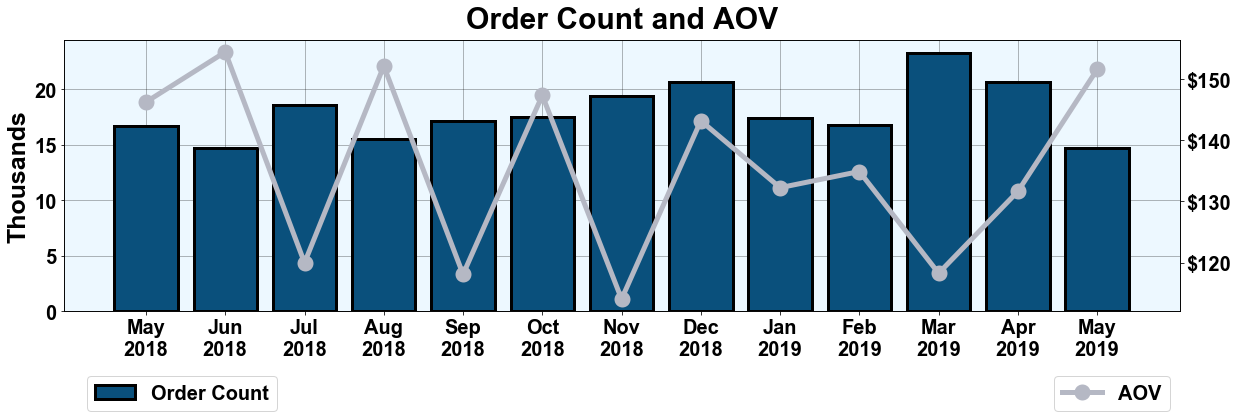

In [26]:
fig, ax = plt.subplots(figsize = (20,5))

x = np.arange(len(c1))
y1 = c1['total count']
y2 = c1['aov']

ax.bar(x, y1, color = colors[2], lw = 3, zorder = 5, edgecolor = 'black')
ax.set_yticklabels(['{:,.0f}'.format(x/1000) for x in ax.get_yticks()])
ax.set_ylabel('Thousands')
ax.set_title('Order Count and AOV', y = 1.02)
ax.set_facecolor(colors[5])
ax.legend(['Order Count'], bbox_to_anchor = (0.2, -0.2))
ax.grid(color = 'black', alpha = 0.35, zorder = 0)

ax2 = ax.twinx()
ax2.plot(x, y2, color = colors[4], marker = 'o', mew = 10)
ax2.set_yticklabels(['${:,.0f}'.format(x) for x in ax2.get_yticks()])
ax2.legend(['AOV'], bbox_to_anchor = (1, -0.2))

ax.set_xticks(x)
ax.set_xticklabels(pretty_dates)

plt.savefig(image_path + ax.get_title(), bbox_inches = 'tight')
plt.show()

### Approval Percentage
From email with subject line "Quick question on benchmarks from Adafruit Industries"

If you are attempting to take a transaction download and calculate it into an approval percentage there are a few steps. 

 

1.       Count all Response Code 1 transactions =COUNTIF(Range,"1")

2.       Count then Minus all Action Code “void” and “Expired” transactions from the previous steps results =COUNTIF(Range,"Void") , =COUNTIF(Range,"Expired")

3.       Count all “2” transactions =COUNTIF(Range,"2")

4.       Add the totals from step 2 and 3 to get the total transaction count

5.       Divide step 3 by step 4 to get the decline percentage

6.       1 minus step 5 results should give you the approval percentage listed in Transaction Statistics



In [27]:
app = audit_main.groupby(['year and month settlement','response code str'])[['transaction id']].count().unstack(1).fillna(0)
app.columns = app.columns.droplevel(0)
app['total count'] = app.sum(1)
app['approval %'] = app['approved']/app['total count']

fmt = ['n0','n0','n0','n0','p1']

m = jb_mean(app, fmt)
y = jb_yoy(app)

display(m.join(y))
app.format_(fmt).replace('nan%','')

,mean,yoy
Approved,"13,964",-10.31%
Declined,"1,758",-4.11%
Error,10,
Total Count,"15,732",-9.69%
Approval %,89.0%,-0.68%


,Approved,Declined,Error,Total Count,Approval %
year and month settlement,,,,,
2018-05,"12,895","1,412",0,"14,307",90.1%
2018-06,"11,594","1,185",0,"12,779",90.7%
2018-07,"14,967","1,494",126,"16,587",90.2%
2018-08,"12,302","1,305",0,"13,607",90.4%
2018-09,"13,463","1,489",0,"14,952",90.0%
2018-10,"14,114","1,441",0,"15,555",90.7%
2018-11,"14,614","1,768",0,"16,382",89.2%
2018-12,"16,533","1,517",0,"18,050",91.6%
2019-01,"13,846","1,517",0,"15,363",90.1%


### For report

In [28]:
a = app.iloc[-1]['approval %']
b = app['approval %'].mean()

if np.abs(a - b) < 0.02:
    res = 'about equal to'
else:
    if a < b:
        res = 'below'
    else:
        res = 'above'
    
w1 = 'The approval percentage reached {:,.1f}%, {} the average of {:,.1f}%, as shown in the chart below.'.format(a * 100,
                                                                                                                 res,
                                                                                                                 b * 100)
report_dict['approval percentage write'] = w1
report_dict['approval percentage write']

'The approval percentage reached 89.5%, about equal to the average of 89.0%, as shown in the chart below.'

### Plot approvale percentage

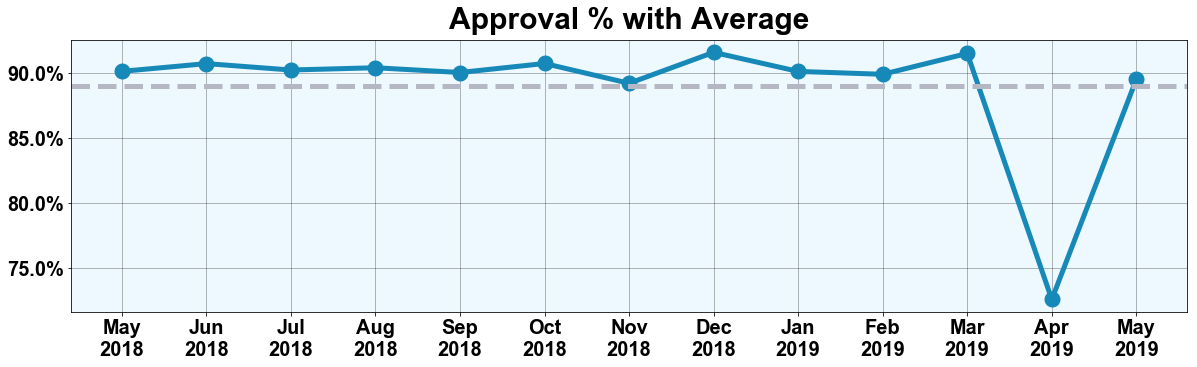

In [29]:
fig, ax = plt.subplots(figsize = (20,5))

x = np.arange(len(app))
y1 = app['approval %']

ax.plot(x, y1, color = colors[1], marker = 'o', mew = 10)
mean = y1.mean()

ax.axhline(mean, color = colors[4], ls = '--')
ax.set_yticklabels(['{:,.1f}%'.format(x*100) for x in ax.get_yticks()])
ax.set_xticks(x)
ax.set_xticklabels(pretty_dates)
ax.set_title('Approval % with Average', y = 1.02)
ax.set_facecolor(colors[5])
ax.grid(color = 'black', alpha = 0.35, zorder = 0)

plt.savefig(image_path + ax.get_title(), bbox_inches = 'tight')
plt.show()

### Refunds/Credits

In [30]:
cred_main = audit_main[audit_main['transaction type'] == 'credit'].copy()

n = cred_main[cred_main['orders id'].isnull()]
print('{:,.0f} OID nulls'.format(len(n)))
cred_main.dropna(subset = ['orders id'], inplace = True)

cred_main['invoice number'] = cred_main['transaction id'].map(dict(zip(csv_super_main['Transaction ID'], csv_super_main['Invoice Number'])))
cred_main['billing status name'] = cred_main['orders id'].map(dict(zip(ot['orders id'], ot['billing status name'])))

oids = cred_main['invoice number'].str.split('-', expand = True)[[0]]
oids.columns = ['orders id']
cred_main.drop('orders id',1,inplace = True)
cred_main = cred_main.join(oids, how = 'left')
cred_main['orders id'] = [int(x) for x in cred_main['orders id']]

cred = cred_main.groupby('year and month settlement').agg({'csv total':'sum','transaction id':'nunique'})
cred.rename(columns = {'csv total':'amount','transaction id':'oid count'}, inplace = True)
cred['avg per order'] = cred['amount']/cred['oid count']

fmt = ['m0','n0','m2']

m = jb_mean(cred, fmt)
y = jb_yoy(cred)

display(m.join(y))
cred.format_(fmt).replace('nan%','')

2 OID nulls


,mean,yoy
Amount,"$9,737",-10.40%
OID Count,144,108.24%
Avg Per Order,$78.30,-56.97%


,Amount,OID Count,Avg Per Order
year and month settlement,,,
2018-05,"$10,501",85,$123.54
2018-06,"$6,300",73,$86.30
2018-07,"$8,102",76,$106.61
2018-08,"$13,189",98,$134.59
2018-09,"$8,891",70,$127.02
2018-10,"$9,192",164,$56.05
2018-11,"$8,001",214,$37.39
2018-12,"$6,537",140,$46.69
2019-01,"$9,493",195,$48.68


### For report

In [31]:
a = cred.iloc[-1]['amount']
b = cred.iloc[0]['amount']
c = a/b-1

w1 = 'The total refund amount {} {:,.1f}% year over year, {} from ${:,.0f} to ${:,.0f}.'.format('decreased' if c < 0 else 'increased',
                                                                                               np.abs(c) * 100,
                                                                                              'down' if c < 0 else 'up',
                                                                                               b,
                                                                                               a)
a = int(cred.iloc[-1]['oid count'])
b = cred.iloc[-1]['avg per order']
c = cred.iloc[0]['avg per order']

if np.abs(a-b) < 1.50:
    res = 'about equal to'
else:
    if b < c:
        res = 'lower than'
    else:
        res = 'greater than'

w2 = 'There were x{} refunds issued for an average amount refunded of ${:,.2f}, {} last year\'s ${:,.2f}.'.format(a,
                                                                                                                  b,
                                                                                                                  res,
                                                                                                                  c)

report_dict['refunds write'] = ' '.join([w1,w2])
report_dict['refunds write']

"The total refund amount decreased 10.4% year over year, down from $10,501 to $9,409. There were x177 refunds issued for an average amount refunded of $53.16, lower than last year's $123.54."

### OID nulls

In [32]:
print('total CSV amount of OID nulls: ${:,.2f}'.format(n['csv total'].sum()))
print('the count is {:,.0f}\n'.format(len(n)))

n_check1 = pd.read_sql(
'''
SELECT
COUNT(*) AS count
FROM authorizenet
WHERE transaction_id IN '''+ str(tuple(n['transaction id'].tolist())) +'''
''', db)

n_check2 = pd.read_sql(
'''
SELECT
COUNT(*) AS count
FROM authorizenet_zero
WHERE transaction_id IN '''+ str(tuple(n['transaction id'].tolist())) +'''
''', db)

print('double check that these OID nulls are NOT in the db')
tot = n_check1.values[0][0] + n_check2.values[0][0]
if tot == 0:
    print('TRUE: these OID nulls are truly not in the db')
else:
    raise ValueError('FALSE: one or more of these OID nulls are in the db')

total CSV amount of OID nulls: $1,546.62
the count is 2

double check that these OID nulls are NOT in the db
TRUE: these OID nulls are truly not in the db


### Plot refunds

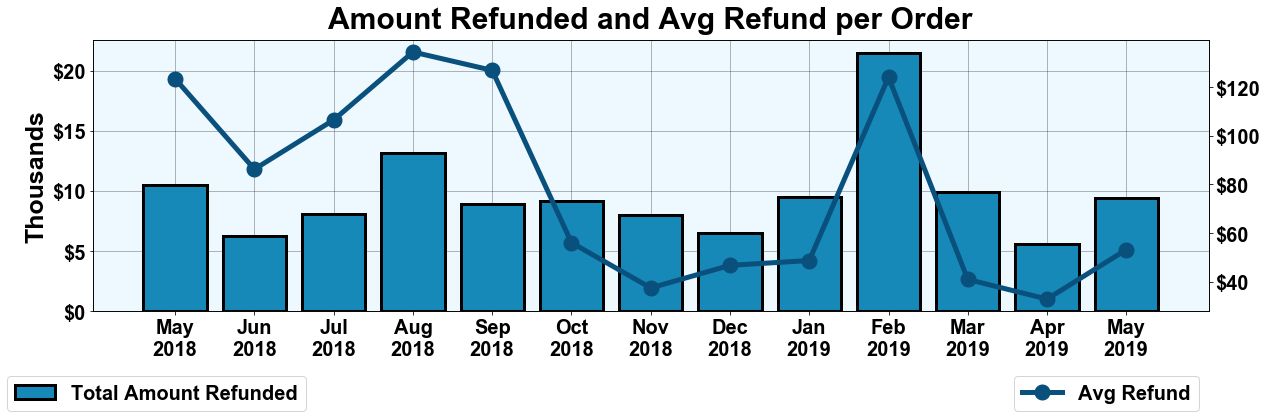

In [33]:
fig, ax = plt.subplots(figsize = (20,5))

x = np.arange(len(cred))
y1 = cred['amount']
y2 = cred['avg per order']

ax.bar(x, y1, color = colors[1], edgecolor = 'black', lw = 3, zorder = 5)
ax.set_yticklabels(['${:,.0f}'.format(x/1000) for x in ax.get_yticks()])
ax.set_ylabel('Thousands')
ax.set_title('Amount Refunded and Avg Refund per Order', y = 1.02)
ax.set_facecolor(colors[5])
ax.legend(['Total Amount Refunded'], bbox_to_anchor = (0.2, -0.2))
ax.grid(color = 'black', alpha = 0.35, zorder = 0)

ax2 = ax.twinx()
ax2.plot(x, y2, color = colors[2], marker = 'o', mew = 10)
ax2.legend(['Avg Refund'], bbox_to_anchor = (1, -0.2))
ax2.set_yticklabels(['${:,.0f}'.format(x) for x in ax2.get_yticks()])

ax.set_xticks(x)
ax.set_xticklabels(pretty_dates)

plt.savefig(image_path + ax.get_title(), bbox_inches = 'tight')
plt.show()

### Refunds of current month

In [34]:
ls = ['orders id','csv total','orders status name','billing status name']

cur_refunds = cred_main[cred_main['year and month settlement'] == date_end[:7]].sort_values('csv total', ascending = False)
cur_refunds = cur_refunds[ls]

print('total amount refunded: ${:,.0f}'.format(cur_refunds['csv total'].sum()))
cur_refunds.format_([0,'m2']).head()

total amount refunded: $9,409


,Orders Id,Csv Total,Orders Status Name,Billing Status Name
206717,2021587,$902.50,Return,Refunded
206851,2048547,$898.40,NaN,NaN
206876,2026209,$607.91,Return,Refunded
206850,2048515,$561.50,Shipped,Refunded
207675,2044293,$500.45,Return,Refunded


### For report

In [35]:
oids = cur_refunds.iloc[:3]['orders id'].tolist()
totals = cur_refunds.iloc[:3]['csv total'].tolist()

link = 'https://volcano.adafruit.com/volcano/Order_Status.php?oid='

for i in range(3):
    report_dict['refund oid ' + str(i)] = str(oids[i])
    report_dict['refund link ' + str(i)] = link + str(oids[i])
    report_dict['refund amount ' + str(i)] = '${:,.0f}'.format(totals[i])

### Fraud
From Kelly in email with subject line "CSP Monthly Chargeback/Fraud Report":
* Fraud stopped = Fraud - Void (orders_status = 15)
* Fraud not stopped = Fraud - Confirmed (orders_status = 9)

In [36]:
osh_main = get_osh_data(date_start, date_end)


== osh_main start ==


== osh_main end ==



In [37]:
fraud_date_start = '2018-05-01' 

ls = ['fraud - void','fraud - confirmed'] # fraud stopped, fraud not stopped
f = osh_main[(osh_main['orders status name'].isin(ls))
           & (osh_main['date added'] >= fraud_date_start)].copy()

d = {ls[0]:'fraud stopped',
    ls[1]:'fraud not stopped'}

for k,v in d.items():
    f['orders status name'] = f['orders status name'].replace(k,v)

f2 = f.groupby(['year and month added','orders status name'])[['order subtotal']].sum().unstack(1).fillna(0)
f2.columns = f2.columns.droplevel(0)
f2['total fraud'] = f2.sum(1)
f2['stopped as % of total'] = f2['fraud stopped']/f2['total fraud']

fmt = ['m0','m0','m0','p1']

m = jb_mean(f2, fmt)
y = jb_yoy(f2)

display(m.join(y))
f2.format_(fmt)

,mean,yoy
Fraud Not Stopped,"$1,845",-51.81%
Fraud Stopped,"$10,805",-45.89%
Total Fraud,"$12,650",-47.66%
Stopped As % Of Total,84.0%,3.38%


,Fraud Not Stopped,Fraud Stopped,Total Fraud,Stopped As % Of Total
year and month added,,,,
2018-05,"$5,938","$13,929","$19,867",70.1%
2018-06,"$1,508","$6,511","$8,019",81.2%
2018-07,"$3,664","$8,235","$11,899",69.2%
2018-08,"$1,024","$15,524","$16,548",93.8%
2018-09,$542,"$7,994","$8,535",93.7%
2018-10,"$1,535","$13,291","$14,826",89.6%
2018-11,"$1,720","$8,969","$10,689",83.9%
2018-12,"$1,240","$3,482","$4,722",73.7%
2019-01,"$1,394","$7,274","$8,669",83.9%


### For report

In [38]:
a = f2.iloc[-1]['fraud stopped']
b = f2.iloc[-1]['stopped as % of total']
c = f2['stopped as % of total'].mean()


w1 = 'The amount of fraud stopped was ${:,.0f}, which is {:,.1f}% of total monthly fraud, {} the average of {:,.1f}%.'.format(a,
                                                                                                                             b * 100,
                                                                                                                             'below' if b < c else 'above',
                                                                                                                             c * 100)
a = f2.iloc[-1]['fraud not stopped']
b = f2.iloc[-1]['total fraud']
c = f2['total fraud'].mean()
w2 = 'The amount of fraud not stopped was ${:,.0f}, which makes for a total fraud amount of ${:,.0f}, {} the average of ${:,.0f}.'.format(a,
                                                                                                                                         b,
                                                                                                                                         'below' if b < c else 'above',
                                                                                                                                         c)

w3 = 'Check out the chart below for fraud over time.'

write = ' '.join([w1,w2,w3])
report_dict['fraud write'] = write
report_dict['fraud write']

'The amount of fraud stopped was $7,537, which is 72.5% of total monthly fraud, below the average of 84.0%. The amount of fraud not stopped was $2,861, which makes for a total fraud amount of $10,398, below the average of $12,650. Check out the chart below for fraud over time.'

### Plot fraud

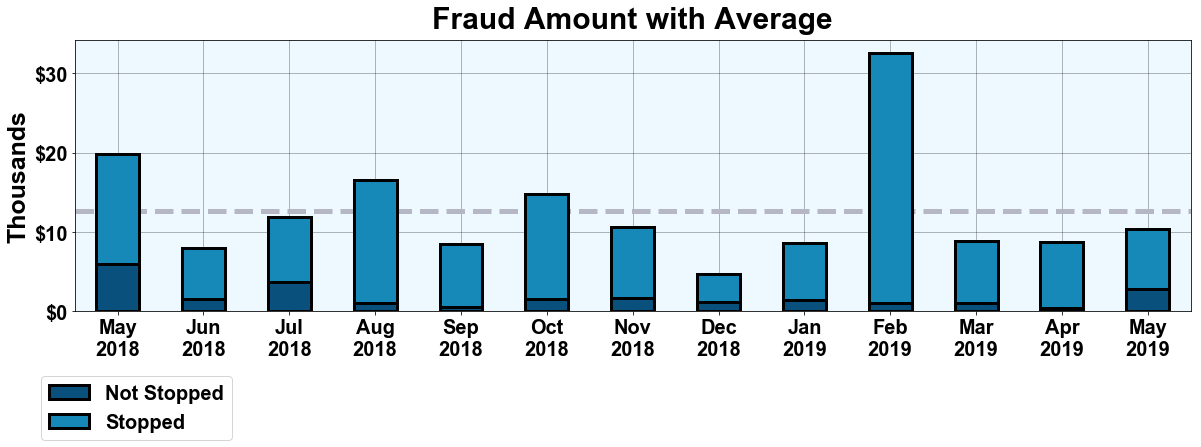

In [39]:
fig, ax = plt.subplots(figsize = (20,5))

f2[['fraud not stopped','fraud stopped']].plot(kind = 'bar',
                                               stacked = True,
                                               color = colors[1:3][::-1],
                                               ax = ax,
                                               edgecolor = 'black',
                                               lw = 3,
                                               zorder = 5)

ax.set_yticklabels(['${:,.0f}'.format(x/1000) for x in ax.get_yticks()])
ax.set_ylabel('Thousands')
ax.set_xlabel('')

l1 = list(f2.index)
l2 = []
for l in l1:
    m = calendar.month_abbr[int(l[-2:])]
    y = l[:4]
    res = m + '\n' + y
    l2.append(res)
    
ax.set_xticklabels(l2, rotation = 0)
ax.set_title('Fraud Amount with Average', y = 1.02)
ax.set_facecolor(colors[5])
ax.legend(['Not Stopped','Stopped'], bbox_to_anchor = (0.15,-0.2))
ax.grid(color = 'black', alpha = 0.35, zorder = 0)

total = f2[['fraud not stopped','fraud stopped']].sum(1)
mean = total.mean()
ax.axhline(mean, color = colors[4], ls = '--')

plt.savefig(image_path + ax.get_title(), bbox_inches = 'tight')
plt.show()

### Chargebacks
This is not used in the report.

In [40]:
cb = osh_main[(osh_main['admin comments'].str.contains('char', case = False))
             & (osh_main['orders status name'] == 'fraud - confirmed')].copy()

min_oid = cb['orders id'].min()

orders_main = pd.read_sql(
'''
SELECT
DATE(date_purchased) AS date_purchased,
orders_id,
LOWER(payment_method) AS payment_method,
order_total
FROM orders
WHERE orders_id >= '''+ str(min_oid) +'''
''', db)

col_fix(orders_main)
orders_main['date purchased'] = pd.to_datetime(orders_main['date purchased'])

cols = orders_main.columns.tolist()
cols.remove('orders id')

for c in cols:
    cb[c] = cb['orders id'].map(dict(zip(orders_main['orders id'], orders_main[c])))

### Chargebacks by month

In [41]:
by_month = cb.groupby(['year and month added','payment method'])[['order total']].sum().unstack(1).fillna(0)
by_month.columns = by_month.columns.droplevel(0)
by_month['total amount'] = by_month.sum(1)

fmt = ['m0','m0','m0','m0']

m = jb_mean(by_month, fmt)
y = jb_yoy(by_month)
display(m.join(y))
by_month.format_(fmt)

,mean,yoy
Amazon Payments,$16,
Credit Card,$790,
Paypal,$5,
Total Amount,$811,


,Amazon Payments,Credit Card,Paypal,Total Amount
year and month added,,,,
2018-05,$0,$974,$0,$974
2018-06,$0,$834,$0,$834
2018-07,$0,"$1,764",$0,"$1,764"
2018-08,$0,$816,$0,$816
2018-09,$0,$167,$0,$167
2018-10,$42,"$1,124",$56,"$1,222"
2018-12,$0,"$1,035",$0,"$1,035"
2019-01,$0,$296,$0,$296
2019-02,$145,"$1,012",$0,"$1,157"


### Payment methods by count

In [42]:
pay = pd.read_sql(
'''
SELECT
DATE_FORMAT(date_purchased, '%Y-%m') AS year_and_month,
payment_method
FROM orders
WHERE DATE(date_purchased) BETWEEN ' '''+ date_start +''' ' AND ' '''+ date_end +''' '
AND orders_status NOT IN (9,11,12,13,14,15)
''', db)

col_fix(pay)

In [43]:
pay['payment method'] = np.where(pay['payment method'].str.contains('Purchase Order'), 'Purchase Order', pay['payment method'])

pay2 = pay.groupby(['year and month','payment method'])[['payment method']].count().unstack(1).fillna(0)
pay2.columns = pay2.columns.get_level_values(1)
pay2.sort_values(pay2.index[-1], 
                 ascending = False, 
                 axis = 1,
                 inplace = True)

pay3 = pay2.iloc[[-1]].T

### For report

In [44]:
rank = pay3.index.get_loc('Credit Card') + 1

if rank == 1:
    ret = 'first'
elif rank == 2:
    ret = 'second'
elif rank == 3:
    ret = 'third'
elif rank == 4:
    ret = 'fourth'
elif rank == 5:
    ret = 'fifth'    
    
report_dict['rank'] = ret

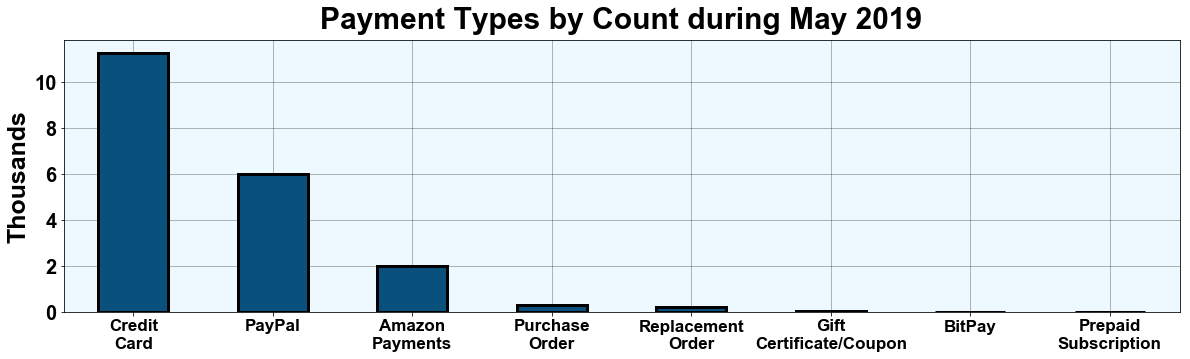

In [45]:
fig, ax = plt.subplots(figsize = (20,5))

xticks = pay3.index
xticks = [x.replace(' ','\n') for x in xticks]

d = date_end
m = calendar.month_abbr[int(d[5:7])]
y = d[:4]
d2 = m + ' ' + y

pay3.plot(kind = 'bar', ax = ax, edgecolor = 'black', color = colors[2], lw = 3, zorder = 5)

ax.set_yticklabels(['{:,.0f}'.format(x/1000) for x in ax.get_yticks()])
ax.set_ylabel('Thousands')
ax.set_xticklabels(xticks, rotation = 0, fontsize = 17)
ax.set_xlabel('')
ax.set_title('Payment Types by Count during %s' % d2, y = 1.02)
ax.set_facecolor(colors[5])
ax.legend().set_visible(False)
ax.grid(color = 'black', alpha = 0.35, zorder = 0)

plt.savefig(image_path + ax.get_title()[:22], bbox_inches = 'tight')
plt.show()

### PDF report

In [46]:
year_and_month = calendar.month_abbr[int(date_end[5:7])] + ' ' + date_end[:4]
report_title = date_end[:4] + ' - ' + date_end[5:7] + ' - ' + calendar.month_abbr[int(date_end[5:7])] + ' - Authorize.net and Gravity Monthly Audit'

In [47]:
a = r_by_month['ot total'].pct_change(periods = 12).iloc[-1]
b = r_by_month.iloc[-1]['cc as % total']

w1 = 'Credit card revenue was {} {:,.0f}% year over year and constituted {:,.0f}% of total revenue;'.format('down' if a < 0 else 'up',
                                                                                                            np.abs(a) * 100,
                                                                                                            b * 100)

a = c1['aov'].pct_change(periods = 12).iloc[-1]
w2 = 'the AOV {} {:,.0f}% year over year;'.format('increased' if a > 0 else 'decreased',
                                                 np.abs(a) * 100)

a = c1.iloc[-1]['fee as % of revenue']
b = c1['fee as % of revenue'].mean()

if np.abs(a-b) < 0.01:
    res = 'in-line with'
else:
    if a < b:
        res = 'below'
    else:
        res = 'above'

w3 = 'fees were {} the average;'.format(res)

a = app.iloc[-1]['approval %']
b = app['approval %'].mean()

if np.abs(a-b) < 0.02:
    res = 'in-line with'
else:
    if a < b:
        res = 'below'
    else:
        res = 'above'
        
w4 = 'approval percentage was {} the average;'.format(res)

a = cred.iloc[-1]['avg per order']
b = cred.iloc[0]['avg per order']
c = a/b-1

w5 = 'the average refund per order {} {:,.0f}% year over year;'.format('decreased' if c < 0 else 'increased',
                                                                      np.abs(c) * 100)

a = f2.iloc[-1]['stopped as % of total']
w6 = 'the amount of fraud stopped was {:,.0f}% of total fraud committed.'.format(a * 100)

write = ' '.join([w1,w2,w3,w4,w5,w6])
report_dict['summary'] = write
report_dict['summary']

'Credit card revenue was down 9% year over year and constituted 48% of total revenue; the AOV increased 4% year over year; fees were in-line with the average; approval percentage was in-line with the average; the average refund per order decreased 57% year over year; the amount of fraud stopped was 72% of total fraud committed.'

In [65]:
if write_pdf == 'yes':
    
    from jinja2 import Environment, FileSystemLoader
    env = Environment(loader = FileSystemLoader(html_path))

    template = env.get_template(html_title)

    template_vars = {'year_and_month':year_and_month,
                     'now':now_pretty,
                     'summary':report_dict['summary'],
                     'revenue_write':report_dict['revenue write'],
                     'order_count_and_aov_write':report_dict['order count and aov write'],
                     'fees_write':report_dict['fees write'],
                     'approval_percentage_write':report_dict['approval percentage write'],
                     'refunds_write':report_dict['refunds write'],
                     
                     'refund_link_0':report_dict['refund link 0'],
                     'refund_link_1':report_dict['refund link 1'],
                     'refund_link_2':report_dict['refund link 2'],
                    
                     'refund_oid_0':report_dict['refund oid 0'],
                     'refund_oid_1':report_dict['refund oid 1'],
                     'refund_oid_2':report_dict['refund oid 2'],
                    
                     'refund_amount_0':report_dict['refund amount 0'],
                     'refund_amount_1':report_dict['refund amount 1'],
                     'refund_amount_2':report_dict['refund amount 2'],
                    
                     'fraud_write':report_dict['fraud write'],
                     'rank':report_dict['rank'],
                     'tilde':tilde}

    html_out = template.render(template_vars)

    from weasyprint import HTML

    HTML(string = html_out).write_pdf(pdf_path + report_title + '.pdf',
                                      stylesheets = [style_sheet_path])                               

In [66]:
print('done')

done
